# CNN

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Model / data parameters
num_classes = 10
#              w    h   c
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

print(y_train)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[1:5])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
[5 0 4 ... 5 6 8]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

# Training the model

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", 
                                                                          keras.metrics.Precision(), 
                                                                          keras.metrics.Recall()])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 66s 156ms/step - loss: 0.3707 - accuracy: 0.8872 - precision: 0.9442 - recall: 0.8375 - val_loss: 0.0828 - val_accuracy: 0.9770 - val_precision: 0.9813 - val_recall: 0.9730
Epoch 2/15
422/422 [==============================] - 54s 129ms/step - loss: 0.1103 - accuracy: 0.9665 - precision: 0.9724 - recall: 0.9619 - val_loss: 0.0658 - val_accuracy: 0.9813 - val_precision: 0.9841 - val_recall: 0.9782
Epoch 3/15
422/422 [==============================] - 53s 125ms/step - loss: 0.0835 - accuracy: 0.9744 - precision: 0.9779 - recall: 0.9710 - val_loss: 0.0468 - val_accuracy: 0.9872 - val_precision: 0.9895 - val_recall: 0.9855
Epoch 4/15
422/422 [==============================] - 55s 130ms/step - loss: 0.0703 - accuracy: 0.9781 - precision: 0.9812 - recall: 0.9757 - val_loss: 0.0406 - val_accuracy: 0.9887 - val_precision: 0.9905 - val_recall: 0.9877
Epoch 5/15
422/422 [==============================] - 53s 125ms/step - loss: 0.0622 - accura

# Visualizing the model metrics

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


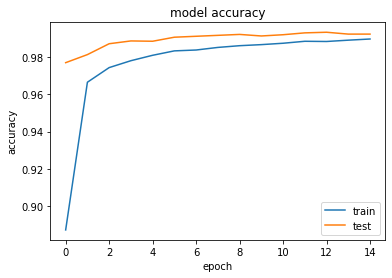

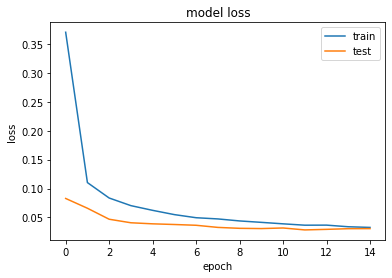

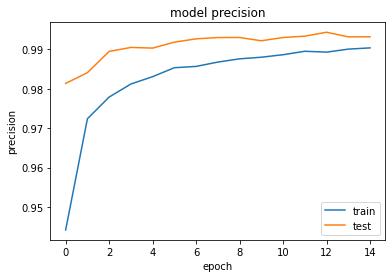

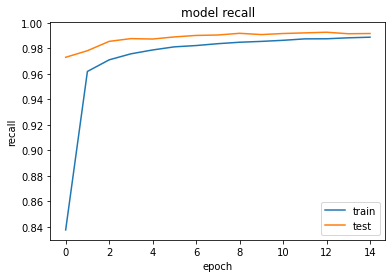

In [6]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


 

In [7]:

#Evaluating Model
score  = model.predict_classes(x_test)


In [8]:
score

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

# Test Accuracy on the model

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.027056943625211716
Test accuracy: 0.9911999702453613


# SVM

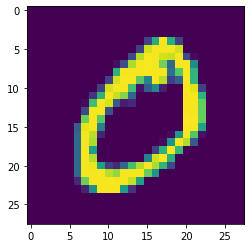

In [10]:
import matplotlib.pyplot as plt


plt.imshow(x_train[1])

## Flattening the data 

In [11]:

def flat(data):
    data_ = []

    for i in range(len(data)):
        data_.append(data[i].flatten())
        
    return data_


### calling the functions

In [12]:
x_test_ = flat(x_test)
x_train_ = flat(x_train)

In [13]:
# y = np.array([0, 0, 0, 0, 0, 0, 1])
# np.argmax(y)

# Creating the classes from categorical data

In [14]:
def test_max(data):
    
    test_c = []
        
    for i in range(len(data)):
        
        test_c.append(np.argmax(data[i]))
        
    return test_c

    

In [15]:
y_test_ = test_max(y_test)
y_train_ = test_max(y_train)

# Splitting the data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train_, y_train_, test_size=0.2, random_state=13)

# SVC (support vector classifier)

In [17]:
from sklearn.svm import SVC

svc = SVC().fit(x_train_, y_train_)

C:\Users\anilkrishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
y_pred_ = svc.predict(x_test_)

In [19]:
y_train_pred = svc.predict(x_train_)

# Calculating the metrics

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Test Accuracy score of the data {accuracy_score(y_pred_, y_test_)}")
print(f"Train Accuracy score of the data {accuracy_score(y_train_pred, y_train_)}")

Test Accuracy score of the data 0.9446
Train Accuracy score of the data 0.943


# Classification report 

In [21]:
print("********* TRAIN CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(y_train_pred, y_train_))

print(" ")

print("********* TEST CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(y_pred_, y_test_))

********* TRAIN CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5985
           1       0.98      0.95      0.97      6925
           2       0.93      0.94      0.93      5939
           3       0.92      0.94      0.93      6000
           4       0.95      0.93      0.94      6022
           5       0.92      0.92      0.92      5449
           6       0.97      0.96      0.96      5984
           7       0.94      0.95      0.95      6197
           8       0.91      0.94      0.93      5661
           9       0.91      0.93      0.92      5838

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000

 
********* TEST CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1008
           1       0.99    